In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import math
from pylab import *

In [43]:
# funksjon for kinetisk energi
def kineticEnergy(mass, velocity):
 
    KineticEnergy = 0.5 * mass * velocity * velocity  # Formelen for kinetisk energi
 
    return KineticEnergy
 
# funskjon til å regne ut potensial energi
def potentialEnergy(mass, g , height):
 
    PotentialEnergy = mass * g * height        # Formelen for potensial energi
 
    return PotentialEnergy

def rotationalEnergy(mass, velocity):
 
    rotationalEnergy = (1/3) * mass * velocity ** 4  # Formelen for kinetisk energi
 
    return rotationalEnergy

In [44]:
# Leser av filen og plaserer data i riktig posisjon
data = pd.read_csv("data.csv")

xPosition = data.x   # Henter verdiene av posisjonene langs x-aksen
x_0 = data.x.iloc[0] # første verdi x

yPosition = data.y   # Henter verdiene av posisjonene langs y-aksen
y_0 = data.y.iloc[0] # første verdi y

time = data.t        # henter tidspunktene
t_0 = data.t.iloc[0] # første verdi t

In [45]:
# inital verdiene
mass = 0.006 # [kg]
height = y_0 # [m]
lenght = 1.2 # [m]
g = 9.81     # [m/s^2]
PE_0 = potentialEnergy(mass, g, height) # potensial energi i starten = den totale energien

# initalize lists 
velocity = []
xVelocity = []
yVelocity = []

KineticE = []
PotentialE = []
rotationalE = []
TotalE = []

EnergyError = []


Text(0, 0.5, 'Lengde [m]')

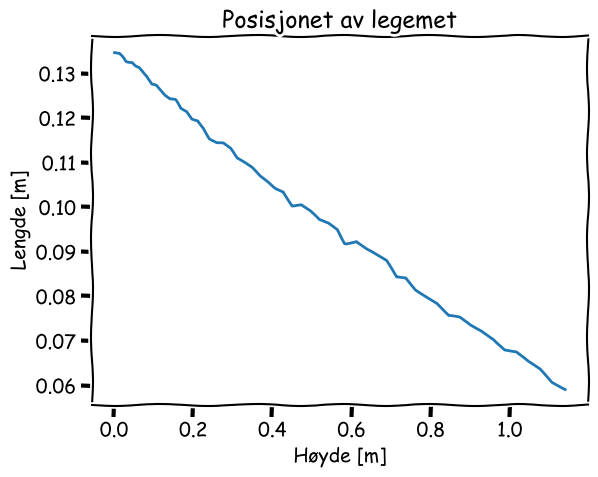

In [46]:
plt.xkcd() # decorate function

# plotter posisjonene
plt.plot(xPosition, yPosition)
plt.title("Posisjonet av legemet")
plt.xlabel("Høyde [m]")
plt.ylabel("Lengde [m]")

Over kan vi se plotter av farten i x rettning (blått), y-rettining(orange) or total farten (grønt). Farten i x-rettning er ikke mulig å se og der er fordi, endringe i y-rettning er relativ lite som gjør at den titale farten går hovedsaklig i x-rettning. Grafene representerer ikke lineær endring i farten på grunn av feil som software "tracker" gjør under samling av data og avrunding som blir gjort av kompelatoren

In [47]:
# Beregner hastigheten 
for i in range(1, len(time)):
    # Endring
    temp_dt = time[i]-time[i-1]
    temp_dx = xPosition[i]-xPosition[i-1]
    temp_dy = yPosition[i]-yPosition[i-1]
    
    temp_velocity = math.sqrt((temp_dx/temp_dt)**2 + (temp_dy/temp_dt)**2)
    
    # energi
    KE = kineticEnergy(mass, temp_velocity)
    PE = potentialEnergy(mass, g, yPosition[i])
    KE_rot = rotationalEnergy(mass, temp_velocity)
    
    TOTE = KE + PE + KE_rot 
    
    ERR = PE_0 - TOTE
    
    # Legger til listene
    # legger til hastighet
    xVelocity.append(temp_dx/temp_dt)
    yVelocity.append(temp_dy/temp_dt)
    velocity.append(temp_velocity/temp_dt)
    
    # Legger til energi
    KineticE.append(KE)
    PotentialE.append(PE)
    rotationalE.append(KE_rot)
    TotalE.append(TOTE)
    
    EnergyError.append(ERR)

time = time[:-1]

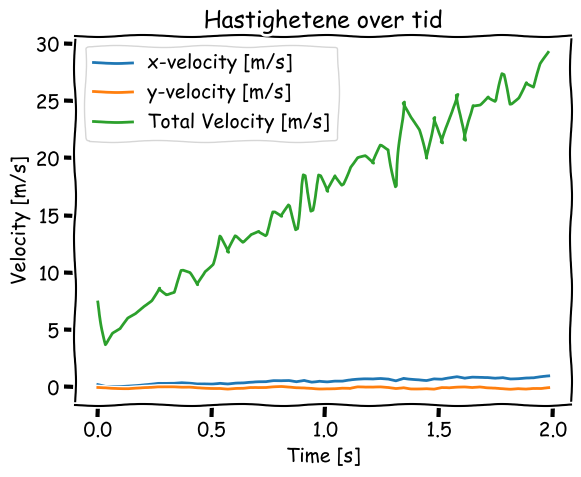

In [48]:

# plotter hastighet over tid
plt.plot(time, xVelocity, label="x-velocity [m/s]")
plt.plot(time, yVelocity, label="y-velocity [m/s]")
plt.plot(time, velocity, label="Total Velocity [m/s]")

plt.title("Hastighetene over tid")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.legend()

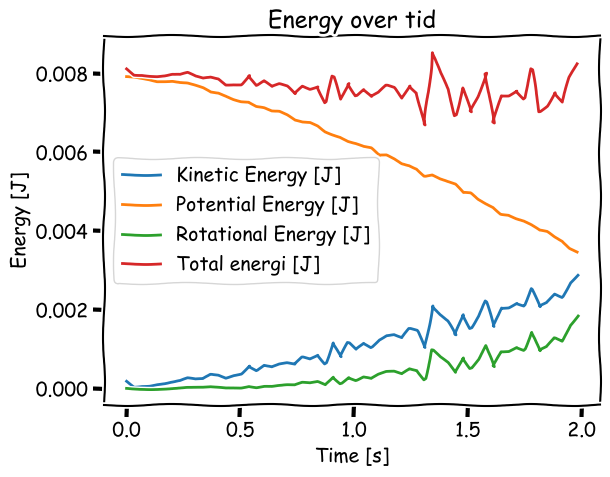

In [49]:
# plotter potensial og kinetisk energi 

plt.title("Energy over tid")

plt.plot(time, KineticE, label="Kinetic Energy [J]")
plt.plot(time, PotentialE, label="Potential Energy [J]")
plt.plot(time, rotationalE, label="Rotational Energy [J]")
plt.plot(time, TotalE, label="Total energi [J]")

plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")

plt.legend()

Den potensiale energien synker gradvis som ballen beveger seg. Energien går fra potensielle til kinetiske og rotasjon. Det er tydelig vist på grafen siden rotasjons- og potensiel energi øker samtidig som den potensielle energien synker. 

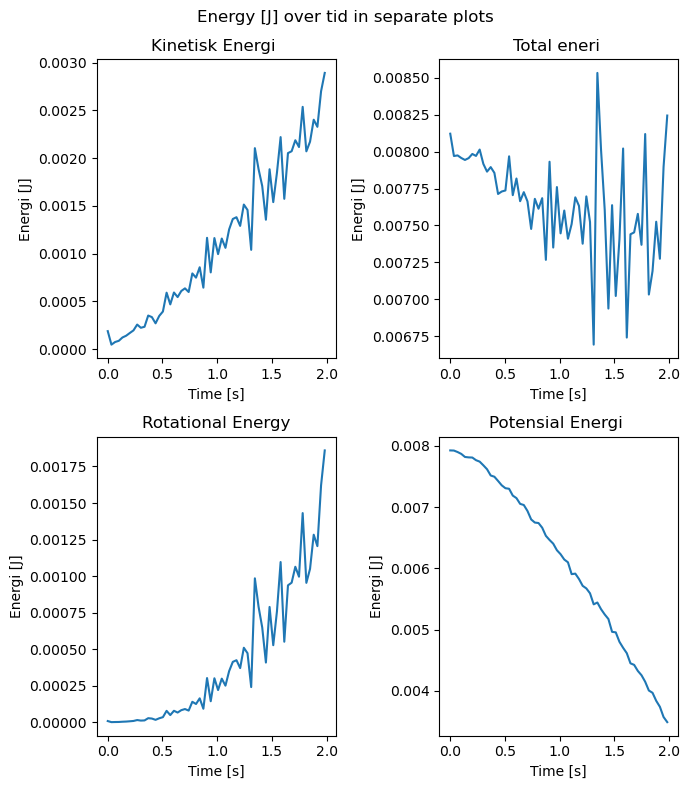

In [50]:
# Plotter potensial og kinetisk energi i separate subplotter
# Når er det mulig å se at kinetisk energi endrer seg

plt.rcdefaults() 

fig, axs = plt.subplots(2, 2, figsize=(7, 8), tight_layout=True)
fig.suptitle('Energy [J] over tid in separate plots')

# plotter kinetisk energi 
axs[0][0].set_title("Kinetisk Energi ")
axs[0][0].set_xlabel("Time [s]")
axs[0][0].set_ylabel("Energi [J]")
axs[0][0].plot(time, KineticE)

# plotter kinetisk energi 
axs[1][0].set_title("Rotational Energy")
axs[1][0].set_xlabel("Time [s]")
axs[1][0].set_ylabel("Energi [J]")
axs[1][0].plot(time, rotationalE)

# plotter potensial energi 
axs[1][1].set_title("Potensial Energi ")
axs[1][1].set_xlabel("Time [s]")
axs[1][1].set_ylabel("Energi [J]")
axs[1][1].plot(time, PotentialE)

# plotter potensial energi 
axs[0][1].set_title("Total eneri ")
axs[0][1].set_xlabel("Time [s]")
axs[0][1].set_ylabel("Energi [J]")
axs[0][1].plot(time, TotalE)

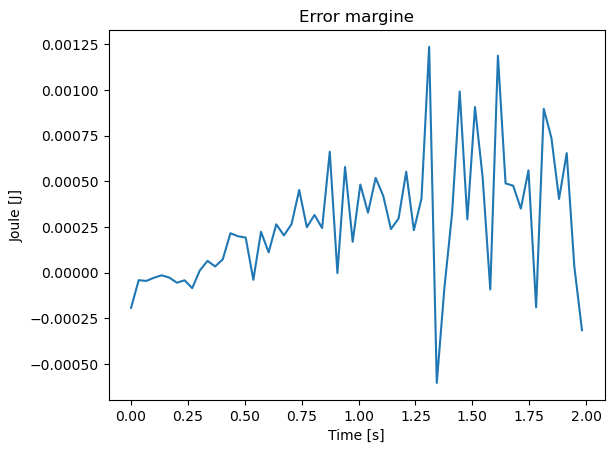

In [52]:
# Error marginen

plt.title("Error margine")
plt.xlabel("Time [s]")
plt.ylabel("Joule [J]")
plt.plot(time, EnergyError)